In [1]:
import pandas as pd
import numpy as np
import math 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)
sns.set_style("darkgrid")

In [3]:
cols = ["Target", "start time", "finish_time", "P/P0", "P/P0_1", "?", 
        "peak_start", "peak_finish", "pick_max", "??", "0", "pick_amplitude", "S_of_pick",
        "grad_koeff", "idk", "idk1", "idk2", "№_1", "1", "1_1", "NaN", "0_1"]

submissions_data = pd.read_csv('/home/mikhail/Development/asrd/examples_data/full_isoterms.srb',
                                encoding='windows-1251', header=None)
submissions_data.columns = cols

In [4]:
submissions_data.head(-1)

,Target,start time,finish_time,P/P0,P/P0_1,?,peak_start,peak_finish,pick_max,??,...,S_of_pick,grad_koeff,idk,idk1,idk2,№_1,1,1_1,NaN,0_1
0,SAMPLE,01.01.03 01:08:15,50/50,Маня,4.00,29.06.2015 17:33:54,0.0723,0,765,765.000000,...,08.05.2015 14:07:38,0.000000,60,0,0,293.16,273.16,1,3.0,1
1,POINT,01.01.2003 1:11:59,01.01.2003 1:23:55,0.06,0.06,226,81.0000,1378,390,-0.001729,...,266.127,0.009506,0,0,0,1.00,1.00,1,NaN,0
2,POINT,01.01.2003 1:27:38,01.01.2003 1:37:42,0.09,0.09,224,118.0000,1871,387,0.001373,...,267.67,0.010730,0,0,0,2.00,1.00,1,NaN,0
3,POINT,01.01.2003 1:41:25,01.01.2003 1:51:06,0.15,0.15,223,104.0000,2157,401,0.000407,...,256.709,0.012920,0,0,0,3.00,1.00,1,NaN,0
4,POINT,01.01.2003 1:54:50,01.01.2003 2:05:35,0.2,0.20,222,81.0000,1590,389,-0.000203,...,256.265,0.014646,0,0,0,4.00,1.00,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,POINT,01.01.2003 3:45:17,01.01.2003 3:49:21,0.93,0.93,224,81.0000,2183,442,0.000916,...,52.335,0.313260,0,0,0,13.00,1.00,1,NaN,1
281,POINT,01.01.2003 4:00:24,01.01.2003 4:04:32,0.9,0.90,222,81.0000,2046,441,-0.000102,...,73.3041,0.214660,0,0,0,14.00,1.00,1,NaN,1
282,POINT,01.01.2003 4:16:04,01.01.2003 4:20:09,0.8,0.80,221,81.0000,1846,429,-0.002136,...,134.261,0.100880,0,0,0,15.00,1.00,1,NaN,1
283,POINT,01.01.2003 4:33:27,01.01.2003 4:37:32,0.7,0.70,225,88.0000,1976,446,0.000509,...,191.818,0.064481,0,0,0,16.00,1.00,1,NaN,1


In [5]:
indexes_of_expirements = np.where(submissions_data['Target']=="SAMPLE")
a =  submissions_data.index[-1] + 1
indexes = np.hstack((indexes_of_expirements[0], a))
indexes

array([  0,  27,  52,  78,  79,  80,  85,  88,  93,  94, 112, 138, 143,
       166, 190, 211, 219, 242, 267, 286])

In [6]:
samples = submissions_data.loc[indexes_of_expirements]
samples.columns = ["type", "create_time", "sample_name", "operator", "?", "??", 
        "mass", "vlazhnost'", "atmosphere_pressure", "atmosphere_pressure_1", "graduation_name", "0", "graduation_time",
        "??????", "summarnyy_raskhod", "idk", "idk1", "T, K", "273.16K", "1_1", "density", "L/D"]
samples.index = [x for x in range(len(samples))]
np.array(samples.sample_name)

array(['50/50 ', '50/50 С-60', '90/10', 'ГАП1', 'ГАП1', 'ГАП1', 'ГАП2',
       'ГАП-2', 'ГАП-1', '90%SiO2-10%SnO2', 'Старый 90%-10%+С60',
       'Катин н1', 'ГАП1', 'ГАП-1', '90/10+C60 NEW', '90-10 повтор',
       'бут_085а', '085', 'бут 085а_проверка'], dtype=object)

In [7]:
submissions_data[indexes[2]+1:indexes[3]]

,Target,start time,finish_time,P/P0,P/P0_1,?,peak_start,peak_finish,pick_max,??,...,S_of_pick,grad_koeff,idk,idk1,idk2,№_1,1,1_1,NaN,0_1
53,POINT,01.01.2003 1:26:41,01.01.2003 1:38:03,0.06,0.06,234,120.0,1432,394,-0.000712,...,253.823,0.009506,0,0,0,1.0,1.0,1,NaN,0
54,POINT,01.01.2003 1:41:46,01.01.2003 1:53:51,0.09,0.09,233,80.0,2706,398,0.002747,...,260.85,0.010730,0,0,0,2.0,1.0,1,NaN,0
55,POINT,01.01.2003 1:57:49,01.01.2003 2:10:42,0.15,0.15,229,112.0,2148,407,-0.001526,...,270.546,0.012920,0,0,0,3.0,1.0,1,NaN,0
56,POINT,01.01.2003 2:14:26,01.01.2003 2:23:52,0.2,0.20,226,112.0,2089,400,-0.001170,...,234.292,0.014646,0,0,0,4.0,1.0,1,NaN,0
57,POINT,01.01.2003 2:28:02,01.01.2003 2:37:13,0.3,0.30,225,107.0,1135,397,-0.001628,...,199.773,0.019301,0,0,0,5.0,1.0,1,NaN,0
58,POINT,01.01.2003 2:40:58,01.01.2003 2:51:20,0.4,0.40,223,81.0,1666,399,0.001272,...,176.997,0.025110,0,0,0,6.0,1.0,1,NaN,0
59,POINT,01.01.2003 2:55:03,01.01.2003 3:08:09,0.5,0.50,221,81.0,1732,421,-0.000407,...,153.951,0.033454,0,0,0,7.0,1.0,1,NaN,0
60,POINT,01.01.2003 3:12:46,01.01.2003 3:23:52,0.6,0.60,223,103.0,1932,410,0.000000,...,126.969,0.044382,0,0,0,8.0,1.0,1,NaN,0
61,POINT,01.01.2003 3:27:36,01.01.2003 3:38:58,0.7,0.70,221,81.0,2067,425,-0.003052,...,103.738,0.064481,0,0,0,9.0,1.0,1,NaN,0
62,POINT,01.01.2003 3:42:42,01.01.2003 3:52:47,0.8,0.80,218,80.0,1829,428,0.001526,...,75.2222,0.100880,0,0,0,10.0,1.0,1,NaN,0


In [8]:
samples

,type,create_time,sample_name,operator,?,??,mass,vlazhnost',atmosphere_pressure,atmosphere_pressure_1,...,graduation_time,??????,summarnyy_raskhod,idk,idk1,"T, K",273.16K,1_1,density,L/D
0,SAMPLE,01.01.03 01:08:15,50/50,Маня,4.0,29.06.2015 17:33:54,0.0723,0,765,765.0,...,08.05.2015 14:07:38,0.0,60,0,0,293.16,273.16,1,3.0,1
1,SAMPLE,01.01.03 00:59:05,50/50 С-60,Женя,4.0,01.01.2003 7:05:23,0.0720,0,765,765.0,...,08.05.2015 14:07:38,0.0,60,0,0,293.16,273.16,1,3.0,1
2,SAMPLE,01.01.03 01:20:43,90/10,Женя,4.0,01.01.2003 8:04:20,0.0409,0,757,757.0,...,08.05.2015 14:07:38,0.0,60,0,0,293.16,273.16,1,3.0,1
3,SAMPLE,01.01.03 00:52:00,ГАП1,бригида2,0.0,01.01.2003 0:52:13,0.1010,0,759,759.0,...,01.01.2003 3:56:32,67.0,60,0,0,293.16,273.16,1,3.0,1
4,SAMPLE,01.01.03 00:52:23,ГАП1,бригида2,0.0,01.01.2003 0:53:07,0.1010,0,760,760.0,...,01.01.2003 3:56:32,67.0,60,0,0,293.16,273.16,1,3.0,1
5,SAMPLE,01.01.03 00:55:11,ГАП1,бригида2,0.0,01.01.2003 1:55:06,0.1010,0,760,760.0,...,01.01.2003 3:56:32,67.0,60,0,0,293.16,273.16,1,3.0,1
6,SAMPLE,01.01.03 01:56:22,ГАП2,бригида2,0.0,01.01.2003 2:28:14,0.1000,0,759,759.0,...,29.04.2015 12:38:35,90.0,60,0,0,293.16,273.16,1,3.0,1
7,SAMPLE,01.01.03 00:35:10,ГАП-2,Мария,0.0,01.01.2003 1:42:45,0.1000,0,749,749.0,...,01.01.2003 3:56:32,67.0,60,0,0,293.16,273.16,1,3.0,1
8,SAMPLE,01.01.03 00:30:03,ГАП-1,Бойко Егор,0.0,01.01.2003 0:30:26,0.1000,0,749,749.0,...,01.01.2003 3:56:32,67.0,60,0,0,293.16,273.16,1,3.0,1
9,SAMPLE,01.01.03 02:49:47,90%SiO2-10%SnO2,Маня,4.0,01.01.2003 6:43:03,0.0330,0,762,762.0,...,08.05.2015 14:07:38,0.0,60,0,0,293.16,273.16,1,3.0,1


In [9]:
samples.sample_name[27]

KeyError: 27

In [10]:
for n in range (len(indexes)-1):
    exec('sample_' + '%s = submissions_data[indexes[%d]+1 : indexes[%d +1]]' % (n, n, n))

In [11]:
sample_0

,Target,start time,finish_time,P/P0,P/P0_1,?,peak_start,peak_finish,pick_max,??,...,S_of_pick,grad_koeff,idk,idk1,idk2,№_1,1,1_1,NaN,0_1
1,POINT,01.01.2003 1:11:59,01.01.2003 1:23:55,0.06,0.06,226,81.0,1378,390,-0.001729,...,266.127,0.009506,0,0,0,1.0,1.0,1,NaN,0
2,POINT,01.01.2003 1:27:38,01.01.2003 1:37:42,0.09,0.09,224,118.0,1871,387,0.001373,...,267.67,0.010730,0,0,0,2.0,1.0,1,NaN,0
3,POINT,01.01.2003 1:41:25,01.01.2003 1:51:06,0.15,0.15,223,104.0,2157,401,0.000407,...,256.709,0.012920,0,0,0,3.0,1.0,1,NaN,0
4,POINT,01.01.2003 1:54:50,01.01.2003 2:05:35,0.2,0.20,222,81.0,1590,389,-0.000203,...,256.265,0.014646,0,0,0,4.0,1.0,1,NaN,0
5,POINT,29.06.2015 12:26:05,29.06.2015 12:35:40,0.3,0.30,223,81.0,2205,406,0.000661,...,212.358,0.019301,0,0,0,5.0,1.0,1,NaN,0
6,POINT,29.06.2015 12:39:24,29.06.2015 12:49:36,0.4,0.40,222,80.0,2090,403,0.000661,...,183.534,0.025110,0,0,0,6.0,1.0,1,NaN,0
7,POINT,29.06.2015 12:53:19,29.06.2015 13:06:04,0.5,0.50,220,100.0,2259,396,-0.000102,...,158.704,0.033454,0,0,0,7.0,1.0,1,NaN,0
8,POINT,29.06.2015 13:10:06,29.06.2015 13:20:01,0.6,0.60,229,80.0,1696,395,0.002340,...,134.542,0.044382,0,0,0,8.0,1.0,1,NaN,0
9,POINT,29.06.2015 13:24:17,29.06.2015 13:37:07,0.7,0.70,227,96.0,1763,413,-0.001272,...,113.827,0.064481,0,0,0,9.0,1.0,1,NaN,0
10,POINT,29.06.2015 13:40:56,29.06.2015 13:53:29,0.8,0.80,224,81.0,1632,402,0.000051,...,82.0026,0.100880,0,0,0,10.0,1.0,1,NaN,0


In [12]:
sample_0['S_of_pick'] = sample_0['S_of_pick'].astype(float).convert_dtypes()

<ipython-input-12-274af9e7b23f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_0['S_of_pick'] = sample_0['S_of_pick'].astype(float).convert_dtypes()


In [13]:
y_tips = np.array(sample_0['S_of_pick'], dtype=float) * np.array(sample_0['grad_koeff'], dtype=float)/samples['mass'][0]
x_tips = np.array(sample_0['P/P0'], dtype=float)
tips = pd.DataFrame(y_tips, x_tips)

In [14]:
sample_0['V'] = sample_0['S_of_pick'] * sample_0['grad_koeff'] / samples['mass'][0]

<ipython-input-14-6f54f01f00a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_0['V'] = sample_0['S_of_pick'] * sample_0['grad_koeff'] / samples['mass'][0]


<ipython-input-15-3e7db3bc87fe>:3: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.title("Изотерма адсорбции", fontsize=18, bbox=dict(edgecolor='black', color='w'), horizontalalignment='center')


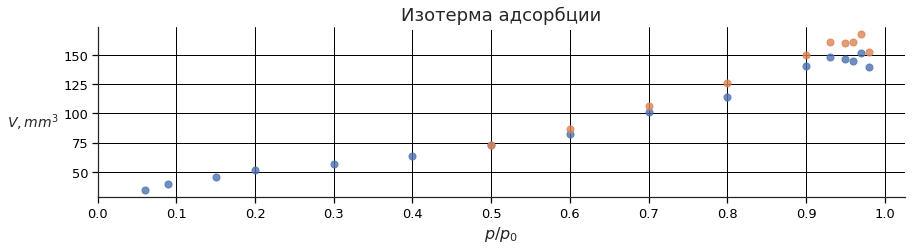

In [15]:
sns.set_style("ticks", {'xtick.color': '.0', 'ytick.color': '.0'})
g = sns.lmplot(x = 'P/P0_1', y = 'V', data = sample_0, hue='0_1',  height=3, aspect=4, legend=0, fit_reg = False, scatter_kws={"s": 50})
plt.title("Изотерма адсорбции", fontsize=18, bbox=dict(edgecolor='black', color='w'), horizontalalignment='center')
plt.ylabel('$V, mm^{3}$', rotation=0, fontsize=14, verticalalignment='top', horizontalalignment='right')
plt.xlabel('$p/p_{0}$', fontsize=16)
plt.xticks(np.arange(0, 1.1, step=0.1), fontsize=13)
plt.yticks(fontsize=13)
plt.grid(True, which=u'major', color='black', linewidth=1., linestyle='-')
g.savefig("C:\\Users\\travk\\Desktop\\Python_work\\Diplom\\data\\test.jpg")

In [16]:
ax = g.fig.add_subplot(111)

for label in ax.xaxis.get_ticklabels():
    # label - это экземпляр текста Text
    label.set_color('red')
    label.set_rotation(-45)
    label.set_fontsize(15)

g

In [14]:
print(sns.axes_style())

{'axes.facecolor': '#EAEAF2', 'axes.edgecolor': 'white', 'axes.grid': True, 'axes.axisbelow': True, 'axes.labelcolor': '.15', 'figure.facecolor': 'white', 'grid.color': 'white', 'grid.linestyle': '-', 'text.color': '.15', 'xtick.color': '.0', 'ytick.color': '.0', 'xtick.direction': 'out', 'ytick.direction': 'out', 'lines.solid_capstyle': 'round', 'patch.edgecolor': 'w', 'patch.force_edgecolor': True, 'image.cmap': 'rocket', 'font.family': ['sans-serif'], 'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif'], 'xtick.bottom': False, 'xtick.top': False, 'ytick.left': False, 'ytick.right': False, 'axes.spines.left': True, 'axes.spines.bottom': True, 'axes.spines.right': True, 'axes.spines.top': True}


In [206]:
import os
os.getcwd()

'E:\\Jupyter Noteboooks'